In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from egbz.utils import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

ModuleNotFoundError: No module named 'sktime'

# Data loading

In [ ]:
dataset = joblib.load('../training_data/dataset.pkl')
t_dataset = joblib.load('../training_data/t_dataset.pkl')
c_dataset = joblib.load('../training_data/c_dataset.pkl')
dataset

In [341]:
mdep = [x for x in dataset.zone.values
        if x not in ['france', '971', '972', '973', '974','976']]
random_deps = np.random.choice(deps, replace=False, size=5)
random_deps

array(['81', '42', '56', '973', '52'], dtype='<U3')

Voici le dataset maximum sans valeurs manquantes :'( :

In [342]:
data = (dataset
    .sel(zone=mdep, time=slice('2020-06-12','2021-04-21'))
    .drop_vars(names=['conf','esms_dc', 'dc_tot'])
)

In [368]:
joblib.dump(data, '../data.dataset')

['../data.dataset']

# Univariate PolynamialTrend

In [344]:
from sktime.forecasting.trend import PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=3)
y = data['hosp'].sel(zone='75').to_dataframe()['hosp']

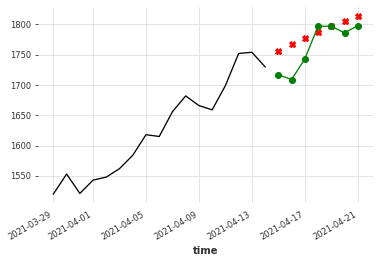

In [345]:
lookback=50
for i in range(1, 8):
    forecaster = PolynomialTrendForecaster(degree=3)
    train = y.iloc[-lookback-7:-7]
    forecaster.fit(train, fh=i) #fh = forecast horizon 
    y_pred = forecaster.predict()
    plt.plot(y_pred, c='red', marker='X');
y.iloc[290:-7].plot();
y.iloc[-7:].plot(label='label', color='green', marker='o');

In [346]:
def objective(trial):
    forecaster = PolynomialTrendForecaster(
        degree=trial.suggest_int('degree', 1, 25)
    )
    train = y.iloc[trial.suggest_int('lookback',-100, -1)-7:-7]
    forecaster.fit(train, fh=7)
    y_pred = forecaster.predict()
    
    return abs(y.iloc[-1] - y_pred)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, show_progress_bar=True)

[I 2021-08-29 22:51:38,274] A new study created in memory with name: no-name-268443d8-8ff2-4b95-839b-612e67887c3a
/home/trom/.local/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2021-08-29 22:51:38,297] Trial 0 finished with value: 27727.697566695886 and parameters: {'degree': 13, 'lookback': -100}. Best is trial 0 with value: 27727.697566695886.
[I 2021-08-29 22:51:38,302] Trial 1 finished with value: 43775.49740748275 and parameters: {'degree': 8, 'lookback': -23}. Best is trial 0 with value: 27727.697566695886.
[I 2021-08-29 22:51:38,307] Trial 2 finished with value: 3140.4192962359066 and parameters: {'degree': 5, 'lookback': -16}. Best is trial 2 with value: 3140.4192962359066.
[I 2021-08-29 22:51:38,312] Trial 3 finished with value: 16579.9039775409 and parameters: {'degree': 10, 'lookback': -81}. Best is trial 2 with value: 3140.4192962359066.
[I 2021-08-29 22:51:38,318] Trial 4 finished with value: 157626080.27763015 and parameters: {'degree': 22, 'lookback': -34}. Best is trial 2 with value: 3140.4192962359066.
[I 2021-08-29 22:51:38,324] Trial 5 finished with value: 55.5703400170396 and parameters: {'degree': 4, 'lookback': -74}. Best is trial 5 w

[I 2021-08-29 22:51:38,924] Trial 58 finished with value: 72.8466856635057 and parameters: {'degree': 2, 'lookback': -40}. Best is trial 52 with value: 3.66533947030166.
[I 2021-08-29 22:51:38,936] Trial 59 finished with value: 1177840.7227798814 and parameters: {'degree': 19, 'lookback': -63}. Best is trial 52 with value: 3.66533947030166.
[I 2021-08-29 22:51:38,947] Trial 60 finished with value: 721348.3204048246 and parameters: {'degree': 23, 'lookback': -87}. Best is trial 52 with value: 3.66533947030166.
[I 2021-08-29 22:51:38,959] Trial 61 finished with value: 20.930790873546584 and parameters: {'degree': 3, 'lookback': -49}. Best is trial 52 with value: 3.66533947030166.
[I 2021-08-29 22:51:38,970] Trial 62 finished with value: 27.442695012059175 and parameters: {'degree': 5, 'lookback': -56}. Best is trial 52 with value: 3.66533947030166.
[I 2021-08-29 22:51:38,982] Trial 63 finished with value: 13.718253533427742 and parameters: {'degree': 3, 'lookback': -46}. Best is trial 52

[I 2021-08-29 22:51:39,547] Trial 108 finished with value: 30.30944254888277 and parameters: {'degree': 4, 'lookback': -48}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:39,561] Trial 109 finished with value: 85.9426847087218 and parameters: {'degree': 1, 'lookback': -54}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:39,572] Trial 110 finished with value: 560.684174044286 and parameters: {'degree': 6, 'lookback': -52}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:39,584] Trial 111 finished with value: 15.440306120982541 and parameters: {'degree': 3, 'lookback': -59}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:39,596] Trial 112 finished with value: 1.9847606378748424 and parameters: {'degree': 3, 'lookback': -63}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:39,608] Trial 113 finished with value: 5.460010313667453 and parameters: {'degree': 3, 'lookback': -64}. Best 

[I 2021-08-29 22:51:40,181] Trial 156 finished with value: 32.150363103940435 and parameters: {'degree': 4, 'lookback': -58}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,194] Trial 157 finished with value: 1.9847606378748424 and parameters: {'degree': 3, 'lookback': -63}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,207] Trial 158 finished with value: 149.3396807789561 and parameters: {'degree': 2, 'lookback': -60}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,219] Trial 159 finished with value: 8.85536383281601 and parameters: {'degree': 3, 'lookback': -55}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,232] Trial 160 finished with value: 9.995042364803567 and parameters: {'degree': 4, 'lookback': -63}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,243] Trial 161 finished with value: 5.460010313667453 and parameters: {'degree': 3, 'lookback': -64}. Best

[I 2021-08-29 22:51:40,808] Trial 207 finished with value: 8.49469313237978 and parameters: {'degree': 4, 'lookback': -61}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,821] Trial 208 finished with value: 5.460010313667453 and parameters: {'degree': 3, 'lookback': -64}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,834] Trial 209 finished with value: 138.48515795625508 and parameters: {'degree': 2, 'lookback': -58}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,847] Trial 210 finished with value: 2.138233948496918 and parameters: {'degree': 3, 'lookback': -62}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,860] Trial 211 finished with value: 6.7819342646528185 and parameters: {'degree': 3, 'lookback': -61}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:40,875] Trial 212 finished with value: 15.611582017609635 and parameters: {'degree': 4, 'lookback': -64}. Bes

[I 2021-08-29 22:51:41,656] Trial 261 finished with value: 125.98237829421987 and parameters: {'degree': 2, 'lookback': -56}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:41,675] Trial 262 finished with value: 1.9847606378748424 and parameters: {'degree': 3, 'lookback': -63}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:41,689] Trial 263 finished with value: 2.506921200196757 and parameters: {'degree': 3, 'lookback': -66}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:41,703] Trial 264 finished with value: 15.611582017609635 and parameters: {'degree': 4, 'lookback': -64}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:41,717] Trial 265 finished with value: 33.004668667186934 and parameters: {'degree': 4, 'lookback': -59}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:41,730] Trial 266 finished with value: 1.9847606378748424 and parameters: {'degree': 3, 'lookback': -63}. 

[I 2021-08-29 22:51:42,509] Trial 312 finished with value: 6.731352685154434 and parameters: {'degree': 3, 'lookback': -65}. Best is trial 79 with value: 0.8958158375287439.
[I 2021-08-29 22:51:42,525] Trial 313 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:42,540] Trial 314 finished with value: 3.66533947030166 and parameters: {'degree': 3, 'lookback': -53}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:42,554] Trial 315 finished with value: 183.6340484724251 and parameters: {'degree': 2, 'lookback': -67}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:42,571] Trial 316 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:42,584] Trial 317 finished with value: 16.80428153835328 and parameters: {'degree': 4, 'lookback': -46}. 

[I 2021-08-29 22:51:43,345] Trial 366 finished with value: 83.24603228525098 and parameters: {'degree': 2, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:43,363] Trial 367 finished with value: 1.9847606378748424 and parameters: {'degree': 3, 'lookback': -63}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:43,381] Trial 368 finished with value: 2.506921200196757 and parameters: {'degree': 3, 'lookback': -66}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:43,398] Trial 369 finished with value: 14.18254656359045 and parameters: {'degree': 3, 'lookback': -69}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:43,413] Trial 370 finished with value: 47.74679979518669 and parameters: {'degree': 1, 'lookback': -63}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:43,431] Trial 371 finished with value: 108.46167040506862 and parameters: {'degree': 2, 'lookback': -53}

[I 2021-08-29 22:51:44,171] Trial 417 finished with value: 9.431901694802946 and parameters: {'degree': 3, 'lookback': -43}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:44,197] Trial 418 finished with value: 108.46167040506862 and parameters: {'degree': 2, 'lookback': -53}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:44,220] Trial 419 finished with value: 10.758992415205512 and parameters: {'degree': 3, 'lookback': -45}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:44,236] Trial 420 finished with value: 9.915988782511704 and parameters: {'degree': 3, 'lookback': -56}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:44,254] Trial 421 finished with value: 20.930790873546584 and parameters: {'degree': 3, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:44,272] Trial 422 finished with value: 102.05947238112822 and parameters: {'degree': 2, 'lookback': -5

[I 2021-08-29 22:51:45,018] Trial 465 finished with value: 39.929173364180315 and parameters: {'degree': 4, 'lookback': -55}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,036] Trial 466 finished with value: 34.03718250720044 and parameters: {'degree': 3, 'lookback': -72}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,052] Trial 467 finished with value: 164.86692490976634 and parameters: {'degree': 2, 'lookback': -64}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,069] Trial 468 finished with value: 1.9878614559288508 and parameters: {'degree': 4, 'lookback': -62}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,084] Trial 469 finished with value: 0.8958158375287439 and parameters: {'degree': 3, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,100] Trial 470 finished with value: 0.8958158375287439 and parameters: {'degree': 3, 'lookback': -

[I 2021-08-29 22:51:45,861] Trial 515 finished with value: 35.249945108474094 and parameters: {'degree': 5, 'lookback': -54}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,880] Trial 516 finished with value: 14.209320433600851 and parameters: {'degree': 3, 'lookback': -57}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,896] Trial 517 finished with value: 77.87330167959931 and parameters: {'degree': 2, 'lookback': -47}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,914] Trial 518 finished with value: 31.98775900202486 and parameters: {'degree': 4, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,931] Trial 519 finished with value: 20.930790873546584 and parameters: {'degree': 3, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:45,949] Trial 520 finished with value: 108.46167040506862 and parameters: {'degree': 2, 'lookback': -5

[I 2021-08-29 22:51:46,711] Trial 567 finished with value: 31.98775900202486 and parameters: {'degree': 4, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:46,732] Trial 568 finished with value: 9.431901694802946 and parameters: {'degree': 3, 'lookback': -43}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:46,749] Trial 569 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:46,768] Trial 570 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:46,786] Trial 571 finished with value: 180.6731378165482 and parameters: {'degree': 5, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:46,804] Trial 572 finished with value: 382.534465330883 and parameters: {'degree': 5, 'lookback': -45}.

[I 2021-08-29 22:51:47,581] Trial 615 finished with value: 14.972343260478056 and parameters: {'degree': 4, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:47,600] Trial 616 finished with value: 68.92372674979129 and parameters: {'degree': 4, 'lookback': -42}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:47,619] Trial 617 finished with value: 32.86190857720044 and parameters: {'degree': 5, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:47,636] Trial 618 finished with value: 31.783576176989072 and parameters: {'degree': 4, 'lookback': -54}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:47,654] Trial 619 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:47,672] Trial 620 finished with value: 123.52350416916124 and parameters: {'degree': 5, 'lookback': -5

[I 2021-08-29 22:51:48,456] Trial 661 finished with value: 37.77049615483406 and parameters: {'degree': 4, 'lookback': -53}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:48,472] Trial 662 finished with value: 123.52350416916124 and parameters: {'degree': 5, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:48,488] Trial 663 finished with value: 31.783576176989072 and parameters: {'degree': 4, 'lookback': -54}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:48,504] Trial 664 finished with value: 30.30944254888277 and parameters: {'degree': 4, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:48,520] Trial 665 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:48,537] Trial 666 finished with value: 142.71212040073806 and parameters: {'degree': 6, 'lookback': -4

[I 2021-08-29 22:51:49,525] Trial 716 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:49,546] Trial 717 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:49,567] Trial 718 finished with value: 30.30944254888277 and parameters: {'degree': 4, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:49,586] Trial 719 finished with value: 525.084062760172 and parameters: {'degree': 6, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:49,606] Trial 720 finished with value: 252.6835181570509 and parameters: {'degree': 5, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:49,626] Trial 721 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}

[I 2021-08-29 22:51:50,402] Trial 760 finished with value: 14.972343260478056 and parameters: {'degree': 4, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:50,422] Trial 761 finished with value: 382.534465330883 and parameters: {'degree': 5, 'lookback': -45}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:50,443] Trial 762 finished with value: 39.929173364180315 and parameters: {'degree': 4, 'lookback': -55}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:50,460] Trial 763 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:50,478] Trial 764 finished with value: 180.6731378165482 and parameters: {'degree': 5, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:50,497] Trial 765 finished with value: 466.5478704914067 and parameters: {'degree': 4, 'lookback': -20}

[I 2021-08-29 22:51:51,430] Trial 810 finished with value: 334.41382915399663 and parameters: {'degree': 6, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:51,450] Trial 811 finished with value: 36.91487232182794 and parameters: {'degree': 4, 'lookback': -56}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:51,477] Trial 812 finished with value: 3.66533947030166 and parameters: {'degree': 3, 'lookback': -53}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:51,498] Trial 813 finished with value: 123.52350416916124 and parameters: {'degree': 5, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:51,519] Trial 814 finished with value: 14.972343260478056 and parameters: {'degree': 4, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:51,541] Trial 815 finished with value: 10.617609520663336 and parameters: {'degree': 3, 'lookback': -51

[I 2021-08-29 22:51:52,524] Trial 862 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:52,546] Trial 863 finished with value: 11.492504435336741 and parameters: {'degree': 5, 'lookback': -86}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:52,567] Trial 864 finished with value: 31.783576176989072 and parameters: {'degree': 4, 'lookback': -54}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:52,590] Trial 865 finished with value: 25.09112720028179 and parameters: {'degree': 3, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:52,611] Trial 866 finished with value: 31.98775900202486 and parameters: {'degree': 4, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:52,633] Trial 867 finished with value: 327.0637418564984 and parameters: {'degree': 5, 'lookback': -46

[I 2021-08-29 22:51:53,615] Trial 912 finished with value: 37.77049615483406 and parameters: {'degree': 4, 'lookback': -53}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:53,638] Trial 913 finished with value: 14.972343260478056 and parameters: {'degree': 4, 'lookback': -49}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:53,660] Trial 914 finished with value: 12.365858253391934 and parameters: {'degree': 4, 'lookback': -51}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:53,686] Trial 915 finished with value: 301.4481059915988 and parameters: {'degree': 5, 'lookback': -47}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:53,706] Trial 916 finished with value: 8.85536383281601 and parameters: {'degree': 3, 'lookback': -55}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:53,728] Trial 917 finished with value: 333.152389036416 and parameters: {'degree': 5, 'lookback': -40}. 

[I 2021-08-29 22:51:54,698] Trial 963 finished with value: 40.619719215554824 and parameters: {'degree': 4, 'lookback': -57}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:54,720] Trial 964 finished with value: 30.30944254888277 and parameters: {'degree': 4, 'lookback': -48}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:54,741] Trial 965 finished with value: 32.86190857720044 and parameters: {'degree': 5, 'lookback': -52}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:54,764] Trial 966 finished with value: 327.0637418564984 and parameters: {'degree': 5, 'lookback': -46}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:54,784] Trial 967 finished with value: 0.3229113839538513 and parameters: {'degree': 4, 'lookback': -50}. Best is trial 313 with value: 0.3229113839538513.
[I 2021-08-29 22:51:54,806] Trial 968 finished with value: 376.10220593920576 and parameters: {'degree': 6, 'lookback': -55

In [347]:
study.trials_dataframe().sort_values('value')

,number,value,datetime_start,datetime_complete,duration,params_degree,params_lookback,state
894,894,3.229114e-01,2021-08-29 22:51:53.203995,2021-08-29 22:51:53.224411,0 days 00:00:00.020416,4,-50,COMPLETE
670,670,3.229114e-01,2021-08-29 22:51:48.593668,2021-08-29 22:51:48.610419,0 days 00:00:00.016751,4,-50,COMPLETE
674,674,3.229114e-01,2021-08-29 22:51:48.666538,2021-08-29 22:51:48.683088,0 days 00:00:00.016550,4,-50,COMPLETE
679,679,3.229114e-01,2021-08-29 22:51:48.767658,2021-08-29 22:51:48.786157,0 days 00:00:00.018499,4,-50,COMPLETE
683,683,3.229114e-01,2021-08-29 22:51:48.846018,2021-08-29 22:51:48.862747,0 days 00:00:00.016729,4,-50,COMPLETE
...,...,...,...,...,...,...,...,...
926,926,2.263959e+07,2021-08-29 22:51:53.908063,2021-08-29 22:51:53.927618,0 days 00:00:00.019555,22,-45,COMPLETE
998,998,6.129670e+07,2021-08-29 22:51:55.439458,2021-08-29 22:51:55.459533,0 days 00:00:00.020075,24,-43,COMPLETE
793,793,6.258914e+07,2021-08-29 22:51:51.043929,2021-08-29 22:51:51.062466,0 days 00:00:00.018537,25,-45,COMPLETE
509,509,1.576261e+08,2021-08-29 22:51:45.743190,2021-08-29 22:51:45.758739,0 days 00:00:00.015549,22,-34,COMPLETE


Ok, mais qu'est-ce que ça donne avec une Cross-val ? Définissons une fonction de cross validation sur des fenêtres glissantes.

In [406]:
def sliding_cross_val_score(
    y,
    estimator=None,
    fh=1,
    step_length= 1,
    lookback=1,
    initial_shift=30
) -> np.array:
    # On crée un générateur de fenêtre glissante (on prend un entier)
    sws =  SlidingWindowSplitter(fh=fh, window_length=lookback)
    window_generator = sws._split_windows(
        start=np.random.randint(lookback, lookback+initial_shift),
        end=len(y),
        step_length=step_length,
        fh=fh,
        window_length=lookback
    )
        
    # On itere sur les splits que ça génère 
    cross_val_score = []
    number_of_folds = 0
    for train, test in window_generator:
        number_of_folds += 1
        train, test = y.iloc[train], y.iloc[test]
        estimator.fit(train, fh=fh)
        y_pred = estimator.predict()
        cross_val_score.append(abs(test - y_pred)) 
    
    print(f'number of temporal folds : {number_of_folds}')
    return np.array(cross_val_score)

In [407]:
fh = 1
lookback = 1
forecaster = PolynomialTrendForecaster(degree=1)
cv_result = sliding_cross_val_score(
    y,
    estimator=forecaster)

number of temporal folds : 306


In [361]:
cv_result.mean()

14.192727272727273

In [362]:
fh = 7
cross_val_steps = 10
def objective(trial):
    lookback = trial.suggest_int('lookback', 1, 50)
    degree = trial.suggest_int('degree', 1, 20)
    forecaster = PolynomialTrendForecaster(degree=degree)
    
    cv_result = sliding_cross_val_score(
        y,
        estimator=forecaster,
        fh=fh,
        step_length=cross_val_steps,
        lookback=lookback
    )
    
    return cv_result.mean()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2021-08-29 23:09:17,928] A new study created in memory with name: no-name-bda68415-ad37-43b1-9cca-7087d7b2ebdc
/home/trom/.local/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2021-08-29 23:09:18,016] Trial 0 finished with value: 47040341.72766022 and parameters: {'lookback': 31, 'degree': 18}. Best is trial 0 with value: 47040341.72766022.
[I 2021-08-29 23:09:18,095] Trial 1 finished with value: 14196164752535.043 and parameters: {'lookback': 5, 'degree': 14}. Best is trial 0 with value: 47040341.72766022.
[I 2021-08-29 23:09:18,174] Trial 2 finished with value: 5640769174.053521 and parameters: {'lookback': 8, 'degree': 12}. Best is trial 0 with value: 47040341.72766022.
[I 2021-08-29 23:09:18,252] Trial 3 finished with value: 1761411878824982.5 and parameters: {'lookback': 4, 'degree': 16}. Best is trial 0 with value: 47040341.72766022.
[I 2021-08-29 23:09:18,333] Trial 4 finished with value: 1318.2399221201886 and parameters: {'lookback': 27, 'degree': 6}. Best is trial 4 with value: 1318.2399221201886.
[I 2021-08-29 23:09:18,395] Trial 5 finished with value: 372.97235532987014 and parameters: {'lookback': 47, 'degree': 6}. Best is trial 5 with value:

[I 2021-08-29 23:09:21,982] Trial 47 finished with value: 71.72413793103448 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 47 with value: 71.72413793103448.
[I 2021-08-29 23:09:22,068] Trial 48 finished with value: 73.67857142857143 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 47 with value: 71.72413793103448.
[I 2021-08-29 23:09:22,148] Trial 49 finished with value: 72.10714285714286 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 47 with value: 71.72413793103448.
[I 2021-08-29 23:09:22,229] Trial 50 finished with value: 81880406.41486521 and parameters: {'lookback': 11, 'degree': 11}. Best is trial 47 with value: 71.72413793103448.
[I 2021-08-29 23:09:22,318] Trial 51 finished with value: 74.0 and parameters: {'lookback': 1, 'degree': 13}. Best is trial 47 with value: 71.72413793103448.
[I 2021-08-29 23:09:22,414] Trial 52 finished with value: 1882625998267.4202 and parameters: {'lookback': 4, 'degree': 13}. Best is trial 47 with value: 71.7

[I 2021-08-29 23:09:26,151] Trial 92 finished with value: 128562897759698.78 and parameters: {'lookback': 3, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:26,237] Trial 93 finished with value: 263689469940432.94 and parameters: {'lookback': 2, 'degree': 16}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:26,323] Trial 94 finished with value: 72.76923076923077 and parameters: {'lookback': 1, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:26,426] Trial 95 finished with value: 206001733514.37863 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:26,540] Trial 96 finished with value: 613496373247.6486 and parameters: {'lookback': 6, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:26,631] Trial 97 finished with value: 4.821810496255843e+18 and parameters: {'lookback': 3, 'degree': 20}. Best is trial 91 wit

In [363]:
study.optimize(objective, n_trials=1000, n_jobs=-1)
study.trials_dataframe().sort_values('value')

/home/trom/.local/lib/python3.9/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2021-08-29 23:09:34,856] Trial 103 finished with value: 7931099856851.318 and parameters: {'lookback': 8, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:35,083] Trial 104 finished with value: 8576081741185.883 and parameters: {'lookback': 8, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:35,209] Trial 100 finished with value: 9721296510089.54 and parameters: {'lookback': 8, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:35,228] Trial 111 finished with value: 182047355383071.8 and parameters: {'lookback': 4, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:35,279] Trial 109 finished with value: 104849

[I 2021-08-29 23:09:38,963] Trial 144 finished with value: 1892268750995933.0 and parameters: {'lookback': 2, 'degree': 17}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:39,144] Trial 145 finished with value: 5261085465344.243 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:39,211] Trial 146 finished with value: 588912210824.5356 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:39,372] Trial 147 finished with value: 72.14814814814815 and parameters: {'lookback': 1, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:39,453] Trial 148 finished with value: 70.82142857142857 and parameters: {'lookback': 1, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:39,624] Trial 151 finished with value: 771556825082.3243 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 wit

[I 2021-08-29 23:09:43,804] Trial 192 finished with value: 71.11538461538461 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:43,929] Trial 194 finished with value: 72.44444444444444 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:44,122] Trial 195 finished with value: 67.8076923076923 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:44,190] Trial 198 finished with value: 72.10714285714286 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:44,220] Trial 196 finished with value: 72.14814814814815 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:44,252] Trial 197 finished with value: 70.96428571428571 and parameters: {'lookback': 1, 'degree': 12}. Best is trial 91 with 

[I 2021-08-29 23:09:48,671] Trial 236 finished with value: 70.82142857142857 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:48,780] Trial 238 finished with value: 74.0 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:48,961] Trial 240 finished with value: 71.5 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:48,996] Trial 228 finished with value: 2821606533.7191215 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:49,053] Trial 239 finished with value: 72.10714285714286 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:49,121] Trial 241 finished with value: 72.14814814814815 and parameters: {'lookback': 1, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.

[I 2021-08-29 23:09:53,245] Trial 275 finished with value: 1490636886634.4587 and parameters: {'lookback': 3, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:53,465] Trial 283 finished with value: 229692871650.89746 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:53,629] Trial 285 finished with value: 230008405206.55344 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:53,664] Trial 284 finished with value: 230008405206.55344 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:53,736] Trial 277 finished with value: 1972574675536.5498 and parameters: {'lookback': 4, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:53,879] Trial 287 finished with value: 1558914015.7999966 and parameters: {'lookback': 2, 'degree': 10}. Best is trial 9

[I 2021-08-29 23:09:58,198] Trial 324 finished with value: 2029294615245.6199 and parameters: {'lookback': 3, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:58,244] Trial 325 finished with value: 15384813389724.416 and parameters: {'lookback': 3, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:58,263] Trial 327 finished with value: 5274894088614.644 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:58,456] Trial 326 finished with value: 4984912999962.68 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:58,687] Trial 328 finished with value: 5162161.807692323 and parameters: {'lookback': 2, 'degree': 7}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:09:58,714] Trial 331 finished with value: 6052122312582.4795 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 wit

[I 2021-08-29 23:10:03,373] Trial 372 finished with value: 3653534002.7357793 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:03,394] Trial 373 finished with value: 3107685695.7603755 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:03,509] Trial 375 finished with value: 2868374383.410935 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:03,545] Trial 374 finished with value: 3394084697.454749 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:03,706] Trial 377 finished with value: 183485598414.08862 and parameters: {'lookback': 3, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:03,745] Trial 376 finished with value: 3902712079.9410043 and parameters: {'lookback': 3, 'degree': 10}. Best is trial 91 

[I 2021-08-29 23:10:08,200] Trial 414 finished with value: 71.48148148148148 and parameters: {'lookback': 1, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:08,422] Trial 416 finished with value: 77.65384615384616 and parameters: {'lookback': 1, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:08,433] Trial 418 finished with value: 70.5 and parameters: {'lookback': 1, 'degree': 15}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:08,561] Trial 415 finished with value: 786609017219619.4 and parameters: {'lookback': 6, 'degree': 16}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:08,583] Trial 417 finished with value: 70.89285714285714 and parameters: {'lookback': 1, 'degree': 16}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:08,877] Trial 420 finished with value: 76156111887965.17 and parameters: {'lookback': 6, 'degree': 15}. Best is trial 91 with value: 67.80

[I 2021-08-29 23:10:13,144] Trial 465 finished with value: 87020430832.81482 and parameters: {'lookback': 2, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:13,336] Trial 451 finished with value: 45974905.77142183 and parameters: {'lookback': 3, 'degree': 8}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:13,401] Trial 454 finished with value: 770867081.7838551 and parameters: {'lookback': 13, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:13,443] Trial 453 finished with value: 16208606365618.025 and parameters: {'lookback': 3, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:13,544] Trial 450 finished with value: 12192221360848.408 and parameters: {'lookback': 3, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:13,696] Trial 457 finished with value: 183154232812.83603 and parameters: {'lookback': 3, 'degree': 12}. Best is trial 91 w

[I 2021-08-29 23:10:17,526] Trial 506 finished with value: 16289732123139.436 and parameters: {'lookback': 5, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:17,867] Trial 501 finished with value: 2696.0714285714253 and parameters: {'lookback': 2, 'degree': 3}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:17,913] Trial 509 finished with value: 190665364200.9362 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:17,936] Trial 507 finished with value: 143719779584.15918 and parameters: {'lookback': 5, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:17,940] Trial 508 finished with value: 1.2435607438015262e+16 and parameters: {'lookback': 5, 'degree': 17}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:18,085] Trial 510 finished with value: 230008405206.55344 and parameters: {'lookback': 4, 'degree': 12}. Best is trial

[I 2021-08-29 23:10:22,195] Trial 549 finished with value: 1798222512.6615407 and parameters: {'lookback': 2, 'degree': 10}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:22,329] Trial 550 finished with value: 663610568220.6785 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:22,555] Trial 551 finished with value: 4773692207038.8125 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:22,604] Trial 552 finished with value: 384.61538461538294 and parameters: {'lookback': 2, 'degree': 2}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:22,675] Trial 555 finished with value: 5274894088614.644 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:22,800] Trial 554 finished with value: 4449335683205.985 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 wi

[I 2021-08-29 23:10:26,763] Trial 594 finished with value: 1020782410.8205905 and parameters: {'lookback': 23, 'degree': 19}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:26,924] Trial 597 finished with value: 23894482920.890484 and parameters: {'lookback': 4, 'degree': 11}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:27,016] Trial 601 finished with value: 1.3552251158562808e+18 and parameters: {'lookback': 4, 'degree': 19}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:27,161] Trial 595 finished with value: 211853172993.1881 and parameters: {'lookback': 4, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:27,220] Trial 602 finished with value: 209951532785.59534 and parameters: {'lookback': 3, 'degree': 12}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:27,377] Trial 603 finished with value: 467233.4210754633 and parameters: {'lookback': 42, 'degree': 12}. Best is tri

[I 2021-08-29 23:10:31,895] Trial 637 finished with value: 5077628041916.075 and parameters: {'lookback': 2, 'degree': 14}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:32,054] Trial 641 finished with value: 612757657485.6239 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:32,189] Trial 640 finished with value: 728670427817.855 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:32,367] Trial 644 finished with value: 588912210824.5356 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:32,480] Trial 647 finished with value: 728670427817.855 and parameters: {'lookback': 2, 'degree': 13}. Best is trial 91 with value: 67.8076923076923.
[I 2021-08-29 23:10:32,513] Trial 646 finished with value: 365965.5871738397 and parameters: {'lookback': 46, 'degree': 13}. Best is trial 91 with 

[I 2021-08-29 23:10:37,093] Trial 685 finished with value: 10705.680000000058 and parameters: {'lookback': 5, 'degree': 4}. Best is trial 675 with value: 55.24814814814832.
[I 2021-08-29 23:10:37,105] Trial 683 finished with value: 69.64285714285714 and parameters: {'lookback': 1, 'degree': 1}. Best is trial 675 with value: 55.24814814814832.
[I 2021-08-29 23:10:37,406] Trial 688 finished with value: 5669.273515578455 and parameters: {'lookback': 6, 'degree': 4}. Best is trial 675 with value: 55.24814814814832.
[I 2021-08-29 23:10:37,420] Trial 686 finished with value: 56.451851851851785 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 675 with value: 55.24814814814832.
[I 2021-08-29 23:10:37,545] Trial 689 finished with value: 173594.288417081 and parameters: {'lookback': 10, 'degree': 7}. Best is trial 675 with value: 55.24814814814832.
[I 2021-08-29 23:10:37,561] Trial 687 finished with value: 71.48148148148148 and parameters: {'lookback': 1, 'degree': 1}. Best is trial 6

[I 2021-08-29 23:10:41,428] Trial 732 finished with value: 163.08994708994626 and parameters: {'lookback': 7, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:41,442] Trial 730 finished with value: 139.36263736263734 and parameters: {'lookback': 7, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:41,565] Trial 723 finished with value: 116.08624708624532 and parameters: {'lookback': 9, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:41,675] Trial 733 finished with value: 113.42500000000283 and parameters: {'lookback': 8, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:41,783] Trial 734 finished with value: 147.26999999999754 and parameters: {'lookback': 8, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:41,812] Trial 727 finished with value: 108.58999999999776 and parameters: {'lookback': 8, 'degree': 2}. Best is tri

[I 2021-08-29 23:10:46,217] Trial 780 finished with value: 56.57742504409178 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:46,314] Trial 779 finished with value: 58.012571428571384 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:46,365] Trial 781 finished with value: 64.55837742504413 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:46,526] Trial 769 finished with value: 58.37499999999981 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:46,607] Trial 771 finished with value: 61.11538461538473 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:46,679] Trial 770 finished with value: 63.807692307692534 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 7

[I 2021-08-29 23:10:51,074] Trial 823 finished with value: 168.41556122449248 and parameters: {'lookback': 6, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:51,078] Trial 821 finished with value: 173.8788359788375 and parameters: {'lookback': 6, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:51,268] Trial 822 finished with value: 205.51190476190797 and parameters: {'lookback': 6, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:51,283] Trial 814 finished with value: 96.79745454545315 and parameters: {'lookback': 10, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:51,392] Trial 815 finished with value: 113.15559440559628 and parameters: {'lookback': 10, 'degree': 2}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:51,416] Trial 825 finished with value: 1071.9120879120853 and parameters: {'lookback': 6, 'degree': 3}. Best is tri

[I 2021-08-29 23:10:56,171] Trial 864 finished with value: 465.6820202017604 and parameters: {'lookback': 9, 'degree': 3}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:56,314] Trial 869 finished with value: 60.92711111111101 and parameters: {'lookback': 9, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:56,367] Trial 865 finished with value: 419.26056864960765 and parameters: {'lookback': 9, 'degree': 3}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:56,463] Trial 866 finished with value: 65.72466666666662 and parameters: {'lookback': 9, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:56,548] Trial 868 finished with value: 57.88796296296284 and parameters: {'lookback': 9, 'degree': 1}. Best is trial 705 with value: 50.32000000000019.
[I 2021-08-29 23:10:56,568] Trial 867 finished with value: 67.42222222222217 and parameters: {'lookback': 9, 'degree': 1}. Best is trial 70

[I 2021-08-29 23:11:00,846] Trial 901 finished with value: 54.89423076923087 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:00,899] Trial 911 finished with value: 178.66031746031555 and parameters: {'lookback': 5, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:00,938] Trial 902 finished with value: 58.64814814814799 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:01,000] Trial 905 finished with value: 152.46031746031767 and parameters: {'lookback': 7, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:01,187] Trial 915 finished with value: 199.84515306122734 and parameters: {'lookback': 6, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:01,203] Trial 914 finished with value: 199.52799999999598 and parameters: {'lookback': 5, 'degree': 2}. Best is trial

[I 2021-08-29 23:11:05,749] Trial 951 finished with value: 55.421428571428486 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:05,823] Trial 950 finished with value: 70.97500000000001 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:05,962] Trial 955 finished with value: 57.15000000000017 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:06,048] Trial 954 finished with value: 60.71538461538463 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:06,150] Trial 952 finished with value: 70.97500000000001 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:06,165] Trial 959 finished with value: 57.15000000000017 and parameters: {'lookback': 5, 'degree': 1}. Best is trial 88

[I 2021-08-29 23:11:10,801] Trial 1000 finished with value: 71.77210884353755 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:10,830] Trial 1003 finished with value: 80.17116343014347 and parameters: {'lookback': 23, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:10,959] Trial 996 finished with value: 70.64212454212468 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:11,179] Trial 1006 finished with value: 273.2910714285671 and parameters: {'lookback': 4, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:11,210] Trial 1005 finished with value: 325.61249999999893 and parameters: {'lookback': 4, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:11,376] Trial 999 finished with value: 58.5450549450549 and parameters: {'lookback': 6, 'degree': 1}. Best is tria

[I 2021-08-29 23:11:15,412] Trial 1043 finished with value: 61.3202222222222 and parameters: {'lookback': 9, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:15,437] Trial 1044 finished with value: 59.27777777777783 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:15,692] Trial 1046 finished with value: 53.89904761904755 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:15,702] Trial 1045 finished with value: 61.10576923076939 and parameters: {'lookback': 8, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:15,811] Trial 1049 finished with value: 58.5450549450549 and parameters: {'lookback': 6, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:15,975] Trial 1050 finished with value: 84.62749264465516 and parameters: {'lookback': 20, 'degree': 1}. Best is tria

[I 2021-08-29 23:11:20,237] Trial 1088 finished with value: 151.45879120879118 and parameters: {'lookback': 7, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:20,307] Trial 1090 finished with value: 142.95743219834003 and parameters: {'lookback': 45, 'degree': 2}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:20,456] Trial 1095 finished with value: 62.44571428571427 and parameters: {'lookback': 7, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:20,523] Trial 1096 finished with value: 60.08994708994716 and parameters: {'lookback': 7, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:20,676] Trial 1099 finished with value: 69.8650793650795 and parameters: {'lookback': 7, 'degree': 1}. Best is trial 886 with value: 48.53066666666671.
[I 2021-08-29 23:11:20,743] Trial 1097 finished with value: 59.465714285714185 and parameters: {'lookback': 7, 'degree': 1}. Best is 

,number,value,datetime_start,datetime_complete,duration,params_degree,params_lookback,state
886,886,4.853067e+01,2021-08-29 23:10:57.395294,2021-08-29 23:10:58.378952,0 days 00:00:00.983658,1,6,COMPLETE
887,887,4.853067e+01,2021-08-29 23:10:57.501386,2021-08-29 23:10:58.646589,0 days 00:00:01.145203,1,6,COMPLETE
928,928,4.853067e+01,2021-08-29 23:11:01.900980,2021-08-29 23:11:03.012482,0 days 00:00:01.111502,1,6,COMPLETE
946,946,4.924400e+01,2021-08-29 23:11:03.947917,2021-08-29 23:11:05.477037,0 days 00:00:01.529120,1,5,COMPLETE
705,705,5.032000e+01,2021-08-29 23:10:38.204028,2021-08-29 23:10:38.969264,0 days 00:00:00.765236,1,7,COMPLETE
...,...,...,...,...,...,...,...,...
601,601,1.355225e+18,2021-08-29 23:10:26.541703,2021-08-29 23:10:27.016155,0 days 00:00:00.474452,19,4,COMPLETE
596,596,4.022583e+18,2021-08-29 23:10:26.216135,2021-08-29 23:10:27.894797,0 days 00:00:01.678662,20,3,COMPLETE
97,97,4.821810e+18,2021-08-29 23:09:26.540894,2021-08-29 23:09:26.631321,0 days 00:00:00.090427,20,3,COMPLETE
532,532,4.957192e+18,2021-08-29 23:10:19.701465,2021-08-29 23:10:20.499986,0 days 00:00:00.798521,20,3,COMPLETE


La valeur optimale semble être une approximation linéaire avec un lookback entre 5 et 7, ce qui paraît très raisonnable ! (pour une erreur de 50 environ)

# Univariate Arima.

Essayons maintenant avec un modèle qui pourrait bénificier d'une cross validation avec des expanding windows.

In [418]:
initial_shift=30
step_length=10
number_of_folds=0
ews =  ExpandingWindowSplitter(fh=fh, initial_window=initial_shift)
window_generator = ews._split_windows(
    start=step_length+np.random.randint(0, initial_shift),
    end=len(y),
    step_length=step_length,
    window_length=step_length,
    fh=fh,
)

for train, test in window_generator:
    number_of_folds += 1
    print(test)
print(f'number of temporal expanding folds is {number_of_folds}')

22
32
42
52
62
72
82
92
102
112
122
132
142
152
162
172
182
192
202
212
222
232
242
252
262
272
282
292
302
312
number of temporal expanding folds is 30


In [429]:
def expanding_cross_val_score(
    y,
    estimator=None,
    fh=1,
    step_length= 10,
    initial_shift=30,
    verbose=False
) -> np.array:
    # On crée un générateur de fenêtre glissante (on prend un entier)
    ews =  ExpandingWindowSplitter(fh=fh, initial_window=initial_shift)
    window_generator = ews._split_windows(
        start=initial_shift,
        end=len(y)-fh,
        step_length=step_length,
        window_length=step_length,
        fh=fh,
    )
        
    # On itere sur les splits que ça génère 
    cross_val_score = []
    number_of_folds = 0
    for train, test in window_generator:
        number_of_folds += 1
        train, test = y.iloc[train], y.iloc[test]
        estimator.fit(train, fh=fh)
        y_pred = estimator.predict()
        cross_val_score.append(abs(test - y_pred)) 
    
    if verbose:
        print(f'number of expanding temporal folds: {number_of_folds}')
    return np.array(cross_val_score)

In [ ]:
from sktime.forecasting.arima import AutoARIMA
arima = AutoARIMA()
cv_result = expanding_cross_val_score(
    y, fh=7, estimator=arima,
    initial_shift=30,
    step_length=20)

In [427]:
cv_result.mean()

17.164873287093933